In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import  MinMaxScaler

from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.ensemble import VotingRegressor, RandomForestRegressor
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score
from sklearn.ensemble import GradientBoostingRegressor

In [2]:
tracks_dataset = pd.read_csv("Group_18_data_cleaned.csv") #read the excel file 
tracks_dataset.head()

,oid,timestamp,x,y,body_roll,body_pitch,body_yaw,head_roll,head_pitch,head_yaw,other_oid,other_class,other_x,other_y
0,50187,1842.4,495854.6403,5.405751e+06,0.3,-0.71,190.56,-0.25,-1.09,186.37,"[47646, 50181, 50184, 50187]","[0, 4, 4, 4]","[495923.373133135, 495899.069769386, 495899.05...","[5405744.32136751, 5405738.47595118, 5405739.1..."
1,50187,1842.5,495854.7921,5.405751e+06,0.3,-0.71,190.56,-0.25,-1.09,186.37,"[50181, 50187, 50184, 47646]","[4, 4, 4, 0]","[495899.234566716, 495854.792078353, 495899.22...","[5405738.39126416, 5405750.93930797, 5405739.2..."
2,50187,1842.6,495854.9438,5.405751e+06,0.3,-0.71,190.56,-0.25,-1.09,186.37,"[47646, 50187, 50184, 50181]","[0, 4, 4, 4]","[495921.779445452, 495854.943847121, 495899.35...","[5405744.51929698, 5405750.96626812, 5405739.1..."
3,50187,1842.7,495855.0956,5.405751e+06,0.3,-0.71,190.56,-0.25,-1.09,186.37,"[50187, 47646, 50184, 50181]","[4, 0, 4, 4]","[495855.09561589, 495920.943052671, 495899.490...","[5405750.99322827, 5405744.63008031, 5405739.1..."
4,50187,1842.8,495855.2569,5.405751e+06,0.3,-0.71,190.56,-0.25,-1.09,186.37,"[50187, 50184, 50181, 47646]","[4, 4, 4, 0]","[495855.256935427, 495899.585908147, 495899.72...","[5405751.02150176, 5405739.0332702, 5405738.08..."


In [3]:
tracks_dataset.shape

(4759, 14)

In [4]:
X = tracks_dataset[['body_roll','body_pitch','body_yaw','head_roll','head_pitch','head_yaw']]
X

,body_roll,body_pitch,body_yaw,head_roll,head_pitch,head_yaw
0,0.3,-0.71,190.56,-0.25,-1.09,186.37
1,0.3,-0.71,190.56,-0.25,-1.09,186.37
2,0.3,-0.71,190.56,-0.25,-1.09,186.37
3,0.3,-0.71,190.56,-0.25,-1.09,186.37
4,0.3,-0.71,190.56,-0.25,-1.09,186.37
...,...,...,...,...,...,...
4754,0.3,-0.71,190.56,-0.25,-1.09,186.37
4755,0.3,-0.71,190.56,-0.25,-1.09,186.37
4756,0.3,-0.71,190.56,-0.25,-1.09,186.37
4757,0.3,-0.71,190.56,-0.25,-1.09,186.37


In [5]:
# MinMaxScaler
min_max_scaler = MinMaxScaler()

X_scaled = pd.DataFrame(min_max_scaler.fit_transform(X))

# While scaling the columns names are removed, so resigining them back
X_scaled.columns = X.columns
X_scaled

,body_roll,body_pitch,body_yaw,head_roll,head_pitch,head_yaw
0,0.410112,0.690168,0.532291,0.593075,0.540117,0.518761
1,0.410112,0.690168,0.532291,0.593075,0.540117,0.518761
2,0.410112,0.690168,0.532291,0.593075,0.540117,0.518761
3,0.410112,0.690168,0.532291,0.593075,0.540117,0.518761
4,0.410112,0.690168,0.532291,0.593075,0.540117,0.518761
...,...,...,...,...,...,...
4754,0.410112,0.690168,0.532291,0.593075,0.540117,0.518761
4755,0.410112,0.690168,0.532291,0.593075,0.540117,0.518761
4756,0.410112,0.690168,0.532291,0.593075,0.540117,0.518761
4757,0.410112,0.690168,0.532291,0.593075,0.540117,0.518761


In [6]:
y_scaled = X_scaled['head_yaw']
y_scaled

0       0.518761
1       0.518761
2       0.518761
3       0.518761
4       0.518761
          ...   
4754    0.518761
4755    0.518761
4756    0.518761
4757    0.518761
4758    0.518761
Name: head_yaw, Length: 4759, dtype: float64

In [7]:
X_scaled = X_scaled.drop(['head_yaw'],axis=1)

In [8]:
from sklearn.model_selection import train_test_split

X_train_full, X_test, y_train_full, y_test = train_test_split(X_scaled, y_scaled, test_size=0.3, random_state=38)
X_train, X_valid, y_train, y_valid = train_test_split(X_train_full, y_train_full, test_size=0.3, random_state=38)

In [9]:
print(X_train.shape, X_valid.shape, X_test.shape)

(2331, 5) (1000, 5) (1428, 5)


Ensemble Model before Feature Selection

In [10]:
reg1 = DecisionTreeRegressor(random_state=1,max_depth=3,max_features= 3,min_samples_leaf = 3, min_samples_split = 8)
reg2 = DecisionTreeRegressor(random_state=1,min_samples_split= 5, min_samples_leaf = 1, max_features= 'sqrt',max_depth= 10)
reg3 = SVR(kernel='rbf')
reg4 = SVR(kernel='linear')
reg5 = KNeighborsRegressor(n_neighbors = 5,p= 2, weights='distance')
reg6 = RandomForestRegressor(n_estimators= 2000, min_samples_split= 5, min_samples_leaf = 1, max_features= 'sqrt',max_depth= 10,
                            bootstrap = True)
reg7 = RandomForestRegressor(bootstrap= True, max_depth= 90, max_features= 3,min_samples_leaf = 3, min_samples_split = 8,
                            n_estimators= 200)
reg8 = DecisionTreeRegressor(max_depth=5)
reg9 = SVR(kernel='rbf',C=0.8000000000000003)
reg10 = KNeighborsRegressor(n_neighbors = 3,p= 2, weights='distance')
reg11 = SVR(kernel='rbf',gamma='scale', C=0.8000000000000003)
reg12 = GradientBoostingRegressor(random_state=1)
reg13 = GradientBoostingRegressor(n_estimators=200, learning_rate = 0.05)
reg14 = GradientBoostingRegressor(n_estimators=200, learning_rate = 0.10)
reg15 = KNeighborsRegressor(n_neighbors = 5,p= 2, weights='uniform')
reg16 = RandomForestRegressor(bootstrap= True, max_depth= 90, max_features= 3,min_samples_leaf = 3, min_samples_split = 8,
                            n_estimators= 100)
reg17 = DecisionTreeRegressor(random_state=1,max_depth=13)
reg18 = GradientBoostingRegressor(n_estimators=200, learning_rate = 0.25)
reg19 = KNeighborsRegressor(n_neighbors = 3,p= 2, weights='uniform')
reg20 = RandomForestRegressor(n_estimators= 1000, min_samples_split= 5, min_samples_leaf = 1, max_features= 'sqrt',max_depth= 10,
                            bootstrap = True)

VC = VotingRegressor(estimators=[('DT1', reg1),
                                 ('DT-4', reg2),
                                 ('SVM-rbf', reg3),
                                 ('SVM-linear', reg4),
                                 ('KNN-5',reg5),
                                 ('RF-RS',reg6),
                                 ('RF-GS',reg7),
                                 ('DT2',reg8),
                                 ('SVM-rbf2', reg9),
                                 ('KNN-3',reg10),
                                 ('SVM-rbf3',reg11),
                                 ('Gradient',reg12),
                                 ('Gradient-2',reg13),
                                 ('Gradient-3',reg14),
                                 ('KNN-1',reg15),
                                 ('RF-3',reg16),
                                 ('DT-3',reg17),
                                 ('Gradient-4',reg18),
                                 ('KNN-2',reg19),
                                 ('RF-4',reg20)])

In [11]:
print('Ensemble Model before Feature Selection - results', '\n')
pred = [[]]
for reg, name in zip([reg1,reg2,reg3,reg4,reg5,reg6,reg7,reg8,reg9,reg10,reg11,reg12,reg13,reg14,reg15,reg16,reg17,
                      reg18,reg19,reg20,VC],
                     ['DT1', 'DT-4','SVM-rbf','SVM-linear','KNN-5','RF-RS','RF-GS','DT2','SVM-rbf2','KNN-3','SVM-rbf3',
                      'Gradient','Gradient-2','Gradient-3','KNN-1','RF-3','DT-3','Gradient-4','KNN-2','RF-4','Voting Regressor']):
    reg.fit(X_train, y_train)
    predicted = reg.predict(X_valid)
    pred.append(predicted)
    print(name, 'R2-score on valid:', np.round(r2_score(y_valid, predicted),4))
    print(name, 'Valid error:', np.round(mean_squared_error(y_valid, predicted),4), '\n')

Ensemble Model before Feature Selection - results 

DT1 R2-score on valid: 0.6507
DT1 Valid error: 0.0075 

DT-4 R2-score on valid: 0.7449
DT-4 Valid error: 0.0055 

SVM-rbf R2-score on valid: 0.7007
SVM-rbf Valid error: 0.0064 

SVM-linear R2-score on valid: 0.6044
SVM-linear Valid error: 0.0085 

KNN-5 R2-score on valid: 0.7025
KNN-5 Valid error: 0.0064 

RF-RS R2-score on valid: 0.7322
RF-RS Valid error: 0.0058 

RF-GS R2-score on valid: 0.7059
RF-GS Valid error: 0.0063 

DT2 R2-score on valid: 0.8096
DT2 Valid error: 0.0041 

SVM-rbf2 R2-score on valid: 0.7045
SVM-rbf2 Valid error: 0.0064 

KNN-3 R2-score on valid: 0.6928
KNN-3 Valid error: 0.0066 

SVM-rbf3 R2-score on valid: 0.7045
SVM-rbf3 Valid error: 0.0064 

Gradient R2-score on valid: 0.7452
Gradient Valid error: 0.0055 

Gradient-2 R2-score on valid: 0.7413
Gradient-2 Valid error: 0.0056 

Gradient-3 R2-score on valid: 0.7329
Gradient-3 Valid error: 0.0057 

KNN-1 R2-score on valid: 0.7128
KNN-1 Valid error: 0.0062 

RF-3 R

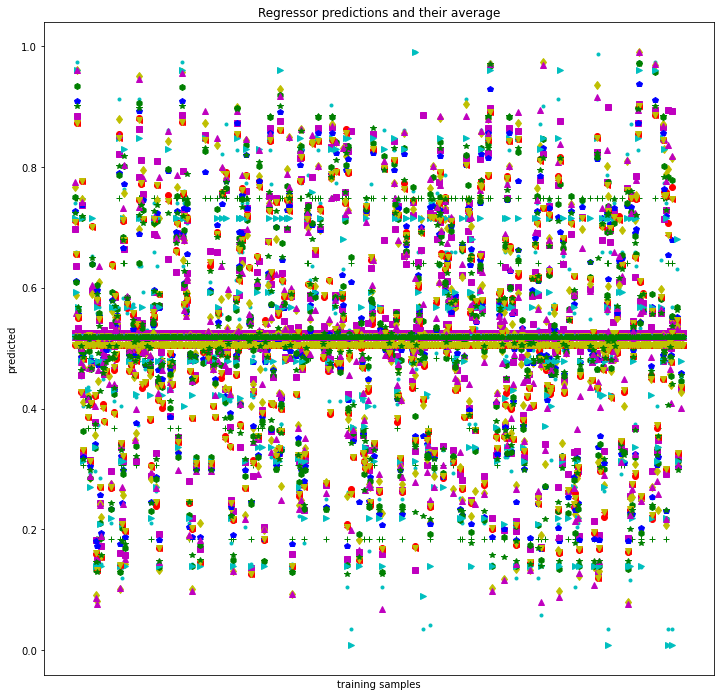

In [12]:
# count = 0
# plt.figure(figsize=(12,12))
# symbols = ['b*','g+','c.','ro','ms','yd','bp','gh','c>','r<','m^','yv','g*']
# for reg, name in zip([reg1, reg2,reg3,reg4,reg5,reg6,reg7,reg8,reg9,reg10,reg11,reg12, VC], ['DT1', 'SVM-Poly','SVM-rbf','SVM-linear',
#                                                       'KNN-5','RF-RS','RF-GS','DT2','SVM-rbf2','KNN-3','SVM-rbf3',
#                                                       'Gradient','Voting Regressor']):
#     plt.plot(pred[count], symbols[count], label=reg)
#     count = count + 1

# plt.tick_params(axis="x", which="both", bottom=False, top=False, labelbottom=False)
# plt.ylabel("predicted")
# plt.xlabel("training samples")
# # plt.legend(loc="best")
# plt.title("Regressor predictions and their average")

# plt.show()

Ensemble Model after Feature Selection using LASSO

In [13]:
X_selected_train = X_train[['body_roll','body_yaw','head_roll','head_pitch']]
y_selected_train = y_train

In [14]:
X_selected_valid = X_valid[['body_roll','body_yaw','head_roll','head_pitch']]
y_selected_valid = y_valid

In [15]:
print('Ensemble Model after Feature Selection using LASSO - results', '\n')
pred = [[]]
for reg, name in zip([reg1,reg2,reg3,reg4,reg5,reg6,reg7,reg8,reg9,reg10,reg11,reg12,reg13,reg14,reg15,reg16,reg17,
                      reg18,reg19,reg20,VC],
                     ['DT1', 'DT-4','SVM-rbf','SVM-linear','KNN-5','RF-RS','RF-GS','DT2','SVM-rbf2','KNN-3','SVM-rbf3',
                      'Gradient','Gradient-2','Gradient-3','KNN-1','RF-3','DT-3','Gradient-4','KNN-2','RF-4','Voting Regressor']):
    reg.fit(X_selected_train, y_train)
    predicted = reg.predict(X_selected_valid)
    pred.append(predicted)
    print(name, 'R2-score on valid data:', np.round(r2_score(y_selected_valid, predicted),4))
    print(name, 'Valid error:', np.round(mean_squared_error(y_selected_valid, predicted),4), '\n')

Ensemble Model after Feature Selection using LASSO - results 

DT1 R2-score on valid data: 0.6297
DT1 Valid error: 0.008 

DT-4 R2-score on valid data: 0.7236
DT-4 Valid error: 0.0059 

SVM-rbf R2-score on valid data: 0.7334
SVM-rbf Valid error: 0.0057 

SVM-linear R2-score on valid data: 0.6043
SVM-linear Valid error: 0.0085 

KNN-5 R2-score on valid data: 0.7462
KNN-5 Valid error: 0.0055 

RF-RS R2-score on valid data: 0.7661
RF-RS Valid error: 0.005 

RF-GS R2-score on valid data: 0.7411
RF-GS Valid error: 0.0056 

DT2 R2-score on valid data: 0.8091
DT2 Valid error: 0.0041 

SVM-rbf2 R2-score on valid data: 0.7379
SVM-rbf2 Valid error: 0.0056 

KNN-3 R2-score on valid data: 0.7549
KNN-3 Valid error: 0.0053 

SVM-rbf3 R2-score on valid data: 0.7379
SVM-rbf3 Valid error: 0.0056 

Gradient R2-score on valid data: 0.7575
Gradient Valid error: 0.0052 

Gradient-2 R2-score on valid data: 0.7537
Gradient-2 Valid error: 0.0053 

Gradient-3 R2-score on valid data: 0.7429
Gradient-3 Valid err

Ensemble Model after Feature Selection using Bidirectional

In [16]:
X_selected_train = X_train[['body_yaw','head_roll','head_pitch','body_pitch']]
y_selected_train = y_train

In [17]:
X_selected_valid = X_valid[['body_yaw','head_roll','head_pitch','body_pitch']]
y_selected_valid = y_valid

In [18]:
print('Ensemble Model after Feature Selection using Bidirectional - results', '\n')
pred = [[]]
for reg, name in zip([reg1,reg2,reg3,reg4,reg5,reg6,reg7,reg8,reg9,reg10,reg11,reg12,reg13,reg14,reg15,reg16,reg17,
                      reg18,reg19,reg20,VC],
                     ['DT1', 'DT-4','SVM-rbf','SVM-linear','KNN-5','RF-RS','RF-GS','DT2','SVM-rbf2','KNN-3','SVM-rbf3',
                      'Gradient','Gradient-2','Gradient-3','KNN-1','RF-3','DT-3','Gradient-4','KNN-2','RF-4','Voting Regressor']):
    reg.fit(X_selected_train, y_train)
    predicted = reg.predict(X_selected_valid)
    pred.append(predicted)
    print(name, 'R2-score on valid data:', np.round(r2_score(y_selected_valid, predicted),4))
    print(name, 'Valid error:', np.round(mean_squared_error(y_selected_valid, predicted),4), '\n')

Ensemble Model after Feature Selection using Bidirectional - results 

DT1 R2-score on valid data: 0.3002
DT1 Valid error: 0.015 

DT-4 R2-score on valid data: 0.6328
DT-4 Valid error: 0.0079 

SVM-rbf R2-score on valid data: 0.6857
SVM-rbf Valid error: 0.0068 

SVM-linear R2-score on valid data: 0.6064
SVM-linear Valid error: 0.0085 

KNN-5 R2-score on valid data: 0.7025
KNN-5 Valid error: 0.0064 

RF-RS R2-score on valid data: 0.7405
RF-RS Valid error: 0.0056 

RF-GS R2-score on valid data: 0.7144
RF-GS Valid error: 0.0061 

DT2 R2-score on valid data: 0.8091
DT2 Valid error: 0.0041 

SVM-rbf2 R2-score on valid data: 0.6927
SVM-rbf2 Valid error: 0.0066 

KNN-3 R2-score on valid data: 0.6957
KNN-3 Valid error: 0.0065 

SVM-rbf3 R2-score on valid data: 0.6927
SVM-rbf3 Valid error: 0.0066 

Gradient R2-score on valid data: 0.7515
Gradient Valid error: 0.0053 

Gradient-2 R2-score on valid data: 0.7338
Gradient-2 Valid error: 0.0057 

Gradient-3 R2-score on valid data: 0.7402
Gradient-3 